# Reporte analítica de datos - Proyecto de Grado II

## Exploración de los datos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('../dengue_data/Data.csv')
df = pd.DataFrame(data)
df["Date"] = pd.to_datetime(df['Date'])
df['Age'] = df['Age'].astype(float)
df.set_index('Id', inplace=True)
df.head(10)

,City,Date,Age,Gender,Neighborhood,Commune
Id,,,,,,
1,Buga,2010-01-14,23.0,F,LA MERCED,4
2,Buga,2010-01-11,23.0,F,EL CARMELO,6
3,Buga,2010-01-10,20.0,M,EL CARMELO,6
4,Buga,2010-01-12,6.0,F,SUCRE,3
5,Buga,2010-01-07,13.0,M,POPULAR,5
6,Buga,2010-03-08,20.0,M,DIVINO NINO,3
7,Buga,2010-03-13,18.0,F,DIVINO NINO,3
8,Buga,2010-03-07,36.0,M,ALTO BONITO,1
9,Buga,2010-03-15,40.0,M,EL JARDIN,5


## BUGA

In [3]:
dfBuga = df[df.City == 'Buga']
dfBuga.head()

,City,Date,Age,Gender,Neighborhood,Commune
Id,,,,,,
1,Buga,2010-01-14,23.0,F,LA MERCED,4
2,Buga,2010-01-11,23.0,F,EL CARMELO,6
3,Buga,2010-01-10,20.0,M,EL CARMELO,6
4,Buga,2010-01-12,6.0,F,SUCRE,3
5,Buga,2010-01-07,13.0,M,POPULAR,5


### *Número de casos reportados por año*

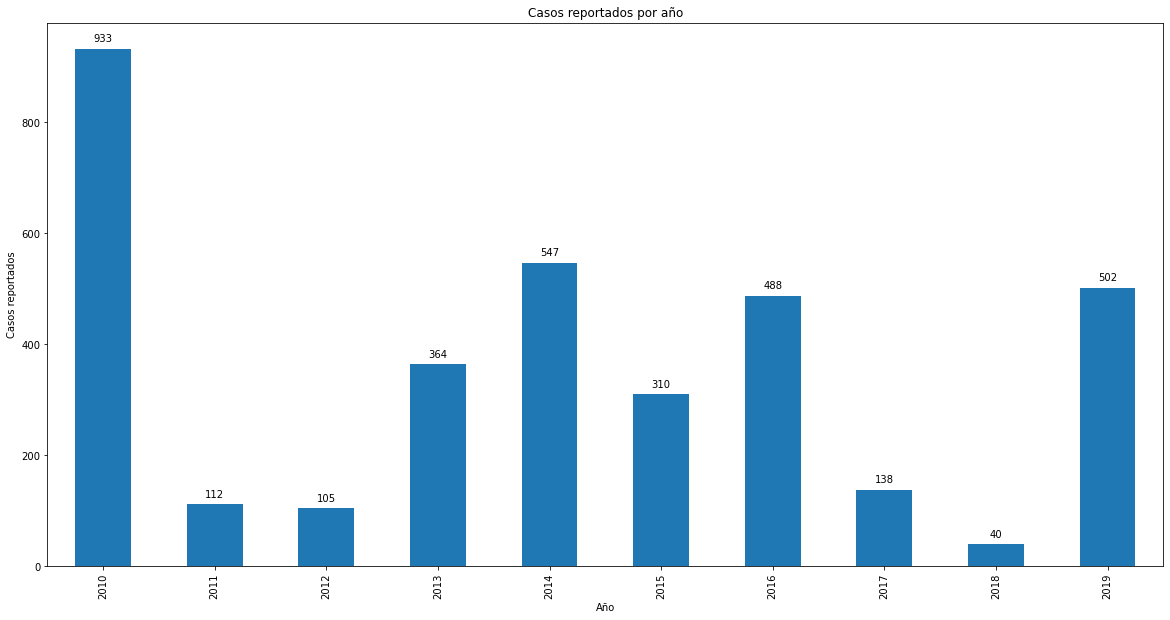

In [4]:
years = dfBuga['Date'].dt.year.value_counts().sort_index().plot(kind='bar', figsize=(20, 10))
years.set_xlabel('Año')
years.set_ylabel('Casos reportados')
years.set_title('Casos reportados por año')

for p in years.patches:
    years.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

### *Número de casos reportados por mes*

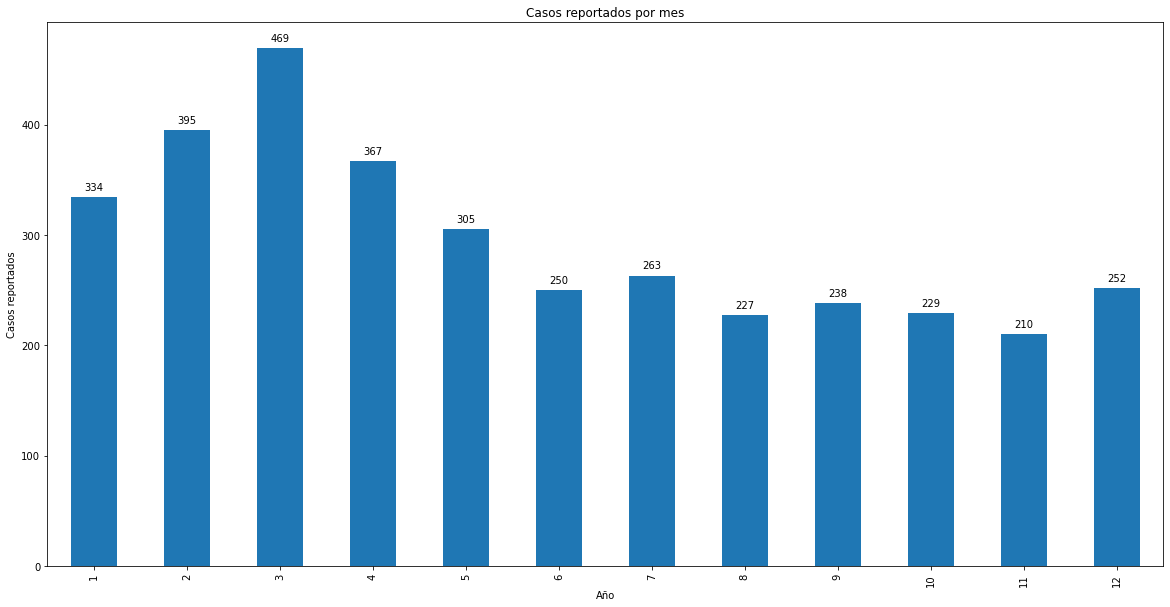

In [5]:
years = dfBuga['Date'].dt.month.value_counts().sort_index().plot(kind='bar', figsize=(20, 10))
years.set_xlabel('Año')
years.set_ylabel('Casos reportados')
years.set_title('Casos reportados por mes')

for p in years.patches:
    years.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

<ipython-input-5-9b4a97a6636d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux['Year'] = aux['Date'].dt.year
<ipython-input-5-9b4a97a6636d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux['Month'] = aux['Date'].dt.month


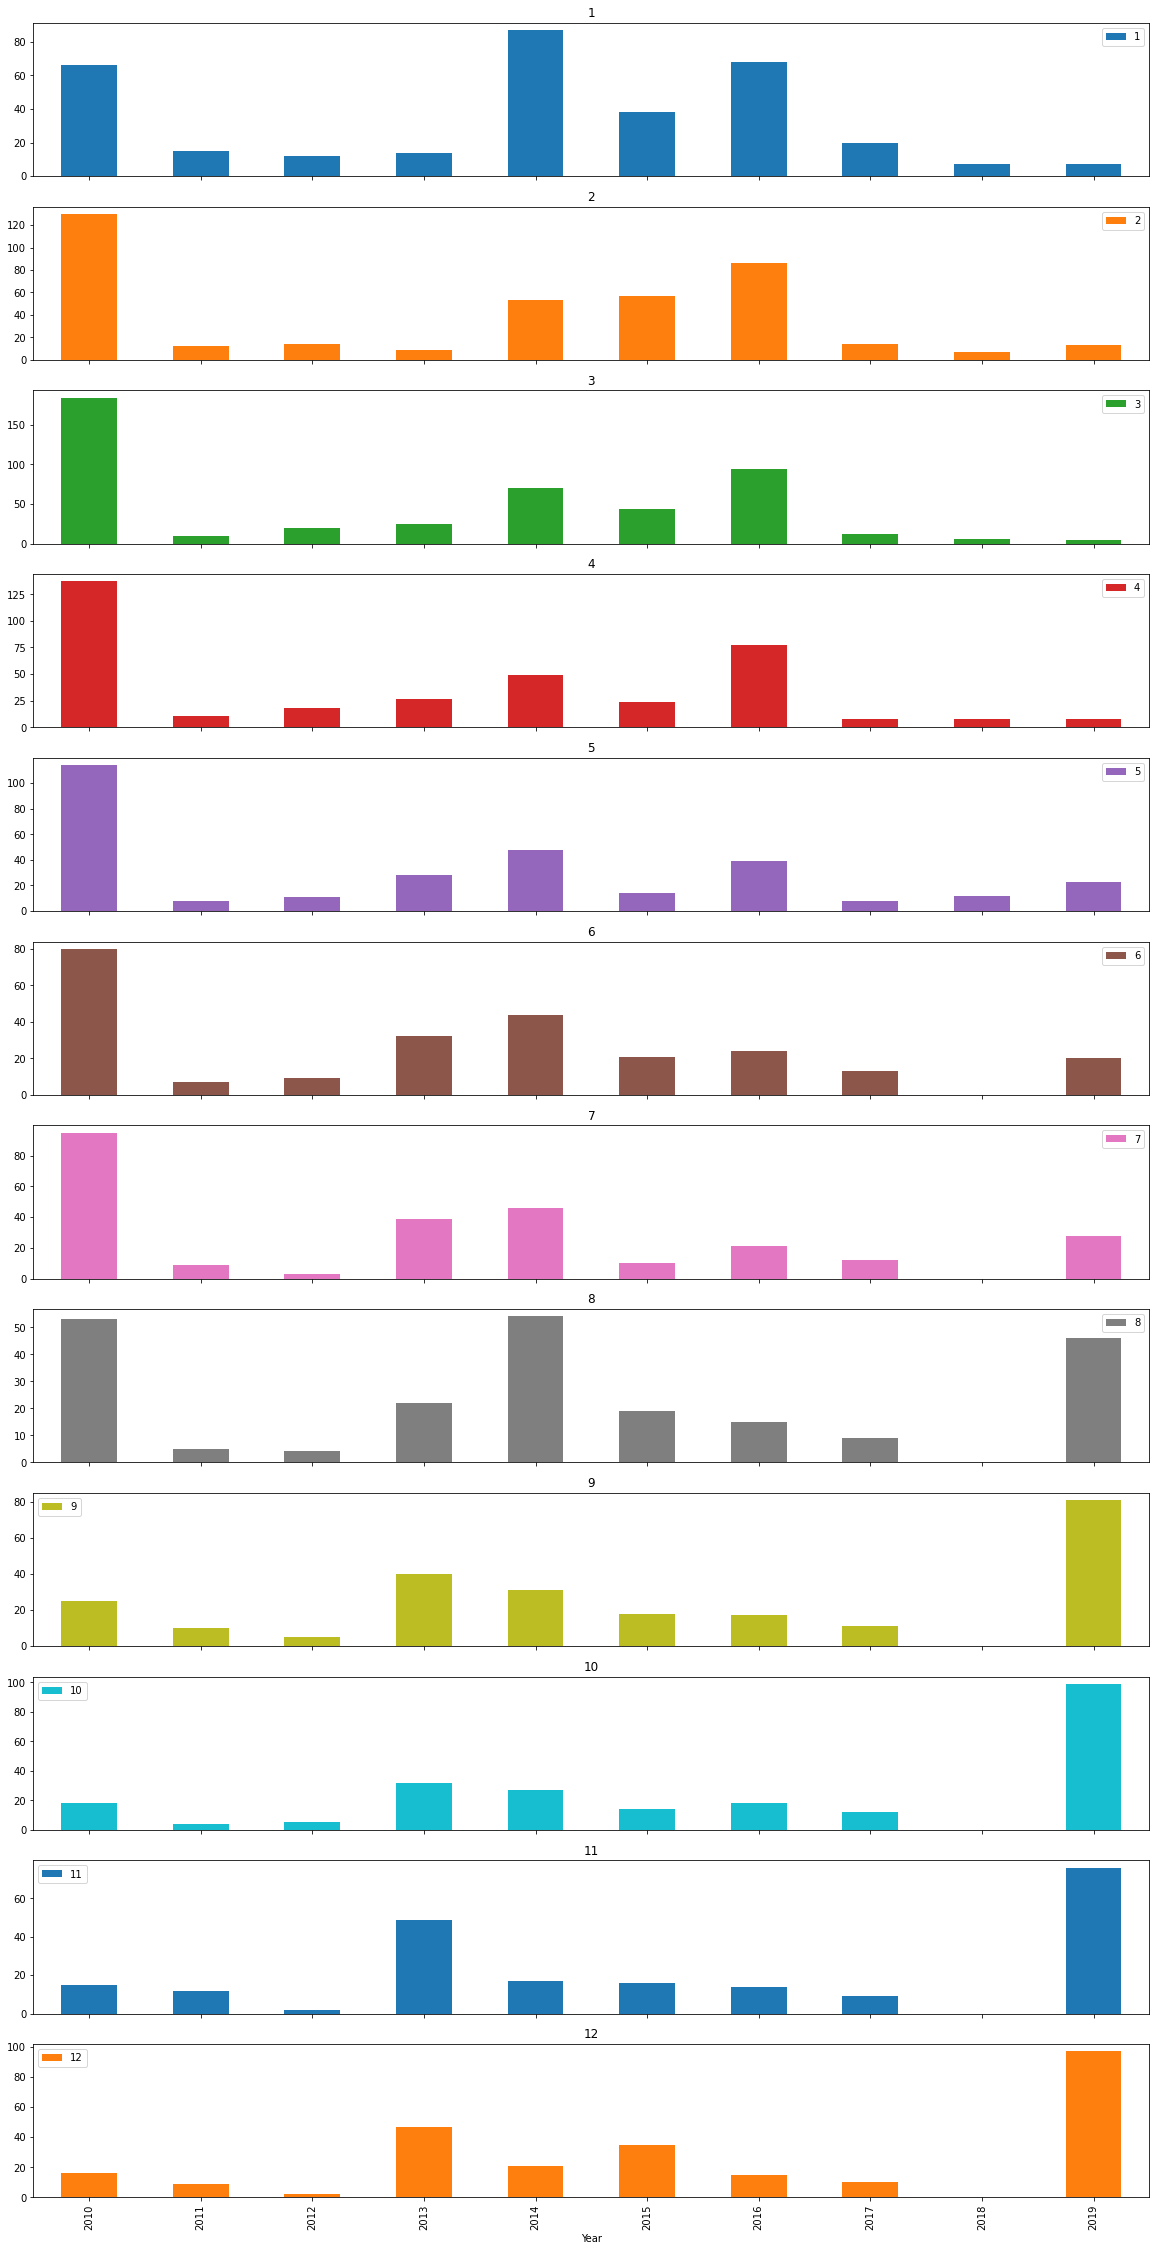

In [5]:
aux = dfBuga
aux['Year'] = aux['Date'].dt.year 
aux['Month'] = aux['Date'].dt.month 
months = aux.groupby(["Year", 'Month']).size().unstack(level=1).plot(kind='bar', figsize=(20,40), subplots=True)

### *Número de casos reportados por sexo*

Text(0.5, 1.0, 'Porcentaje de casos reportados por sexo desde el 2010 hasta el 2018')

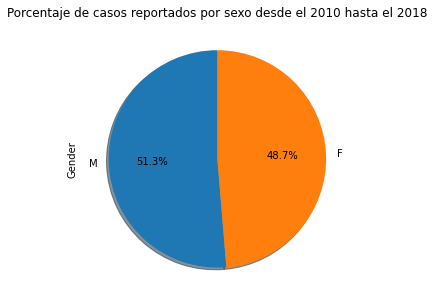

In [7]:
gender = dfBuga['Gender'].value_counts().plot(kind='pie', shadow = True,startangle=90, figsize=(10,5), autopct='%1.1f%%')
gender.set_title("Porcentaje de casos reportados por sexo desde el 2010 hasta el 2018")

### *Número de casos reportados por comuna*

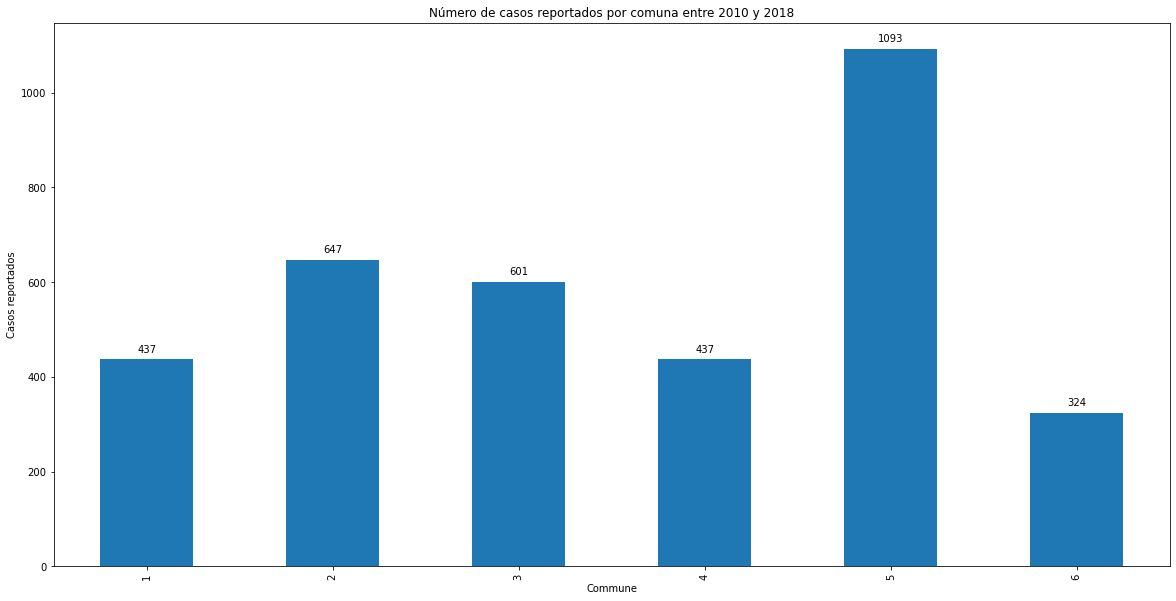

In [8]:
commune = dfBuga['Commune'].value_counts().sort_index().plot(kind='bar', figsize=(20, 10))
commune.set_xlabel('Commune')
commune.set_ylabel('Casos reportados')
commune.set_title('Número de casos reportados por comuna entre 2010 y 2018')

for p in commune.patches:
    commune.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

Text(0.5, 1.0, 'Número de casos reportados por año y comunas')

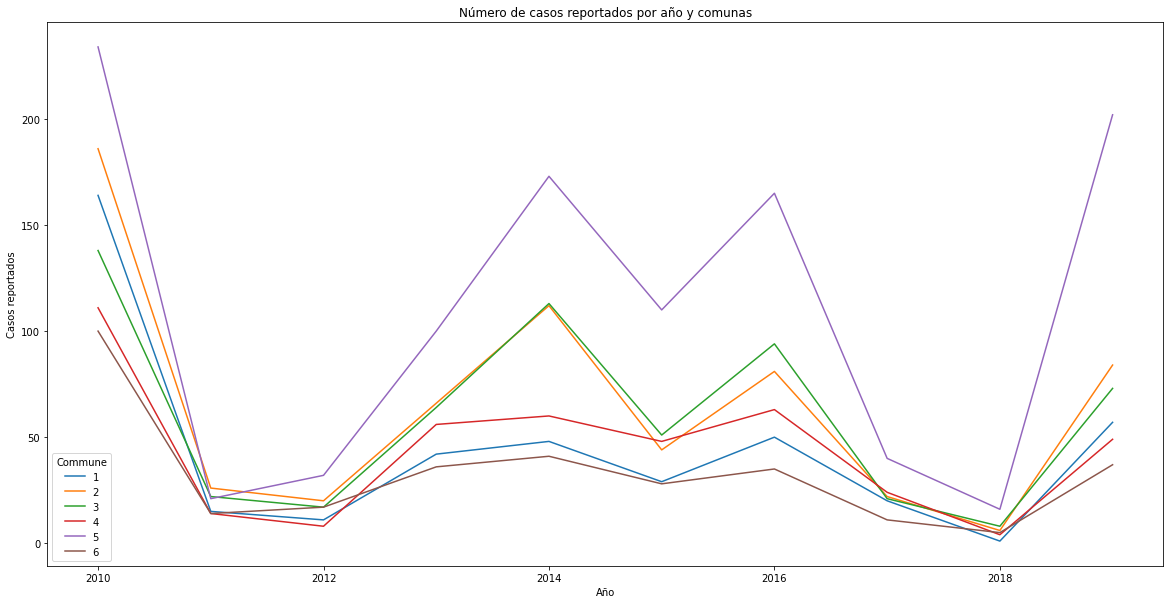

In [7]:
communes_by_year = aux.groupby(["Year", 'Commune']).size().unstack(level=1).plot(kind='line', figsize=(20,10))
communes_by_year.set_xlabel('Año')
communes_by_year.set_ylabel('Casos reportados')
communes_by_year.set_title('Número de casos reportados por año y comunas')

### *Número de casos reportados por barrio*

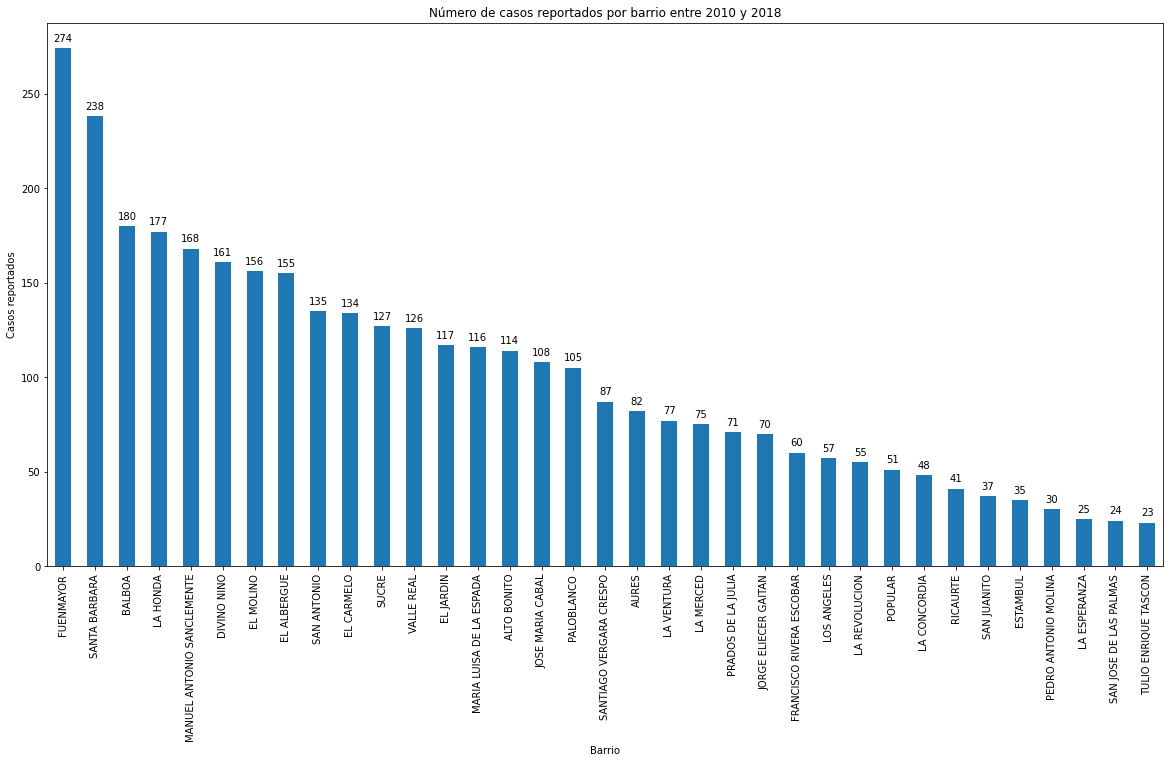

In [10]:
neighborhood = dfBuga['Neighborhood'].value_counts().plot(kind='bar', figsize=(20,10))
neighborhood.set_xlabel('Barrio')
neighborhood.set_ylabel('Casos reportados')
neighborhood.set_title('Número de casos reportados por barrio entre 2010 y 2018')

for p in neighborhood.patches:
    neighborhood.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

### Número de casos reportados por edad

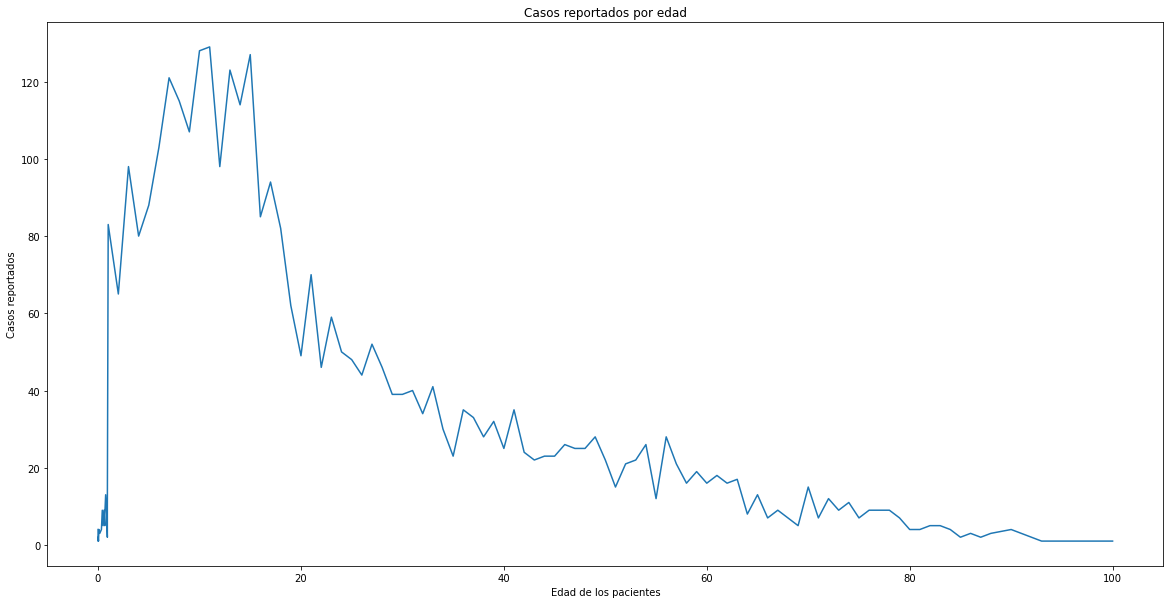

In [11]:
ages = dfBuga['Age'].value_counts().sort_index().plot(kind='line', figsize=(20, 10))
ages.set_xlabel('Edad de los pacientes')
ages.set_ylabel('Casos reportados')
ages.set_title('Casos reportados por edad')

for p in ages.patches:
    ages.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

### Número de casos por día durante los años 2010 - 2019

Text(0.5, 1.0, 'Casos reportados por día')

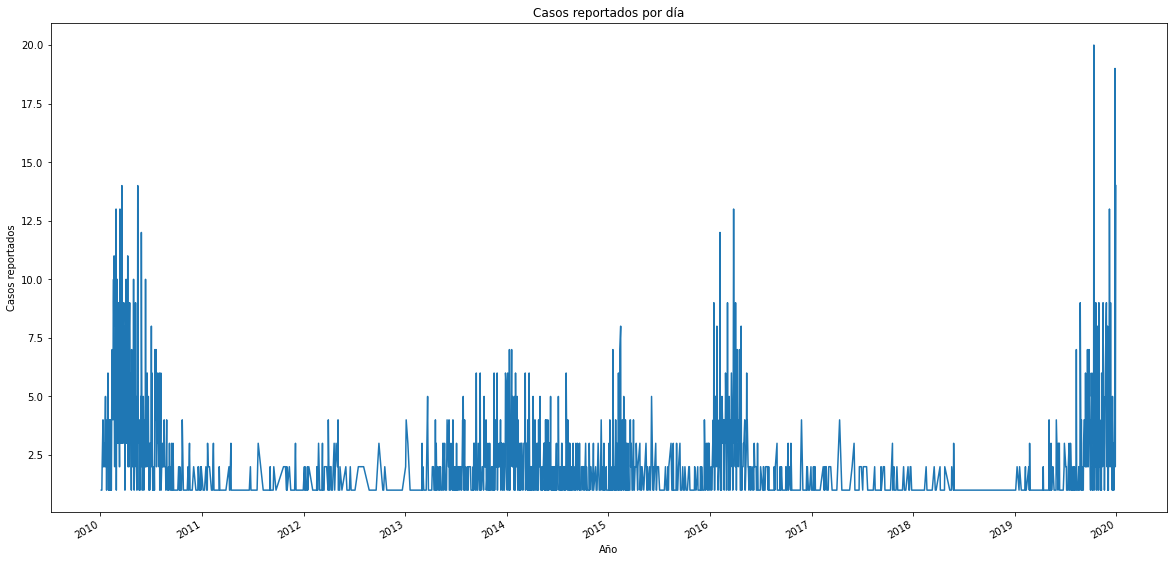

In [12]:
days = dfBuga['Date'].value_counts().plot(kind='line', figsize=(20, 10))
days.set_xlabel('Año')
days.set_ylabel('Casos reportados')
days.set_title('Casos reportados por día')

## YOPAL

In [13]:
dfYopal = df[df.City == 'Yopal']
dfYopal = dfYopal.drop(dfYopal[dfYopal.Date.dt.year==2019].index)
dfYopal = dfYopal.drop(dfYopal[dfYopal.Gender=='MASCULINO'].index)
dfYopal.head()

,City,Date,Age,Gender,Neighborhood,Commune
Id,,,,,,
9602,Yopal,2015-01-10,19.0,F,NUEVO HABITAT 2,5
9603,Yopal,2015-02-03,62.0,F,PROGRESO,5
9604,Yopal,2015-01-11,40.0,F,20 DE JULIO,3
9605,Yopal,2015-01-22,1.0,M,VENCEDORES,4
9606,Yopal,2015-01-13,1.0,F,SALITRE,2


### *Número de casos reportados por año*

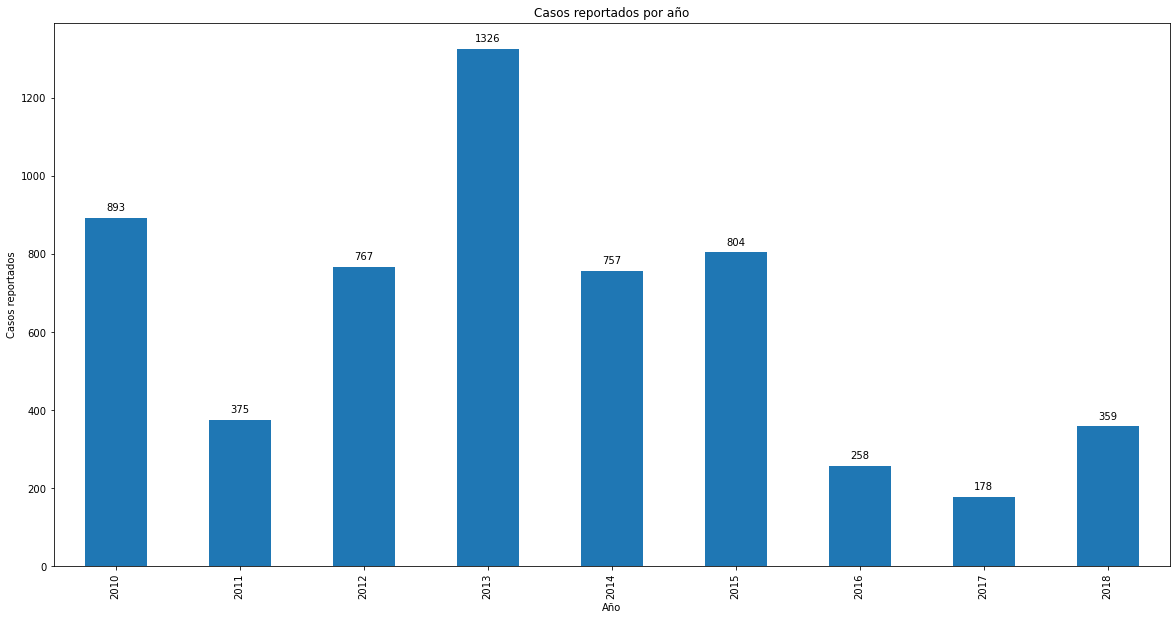

In [14]:
years = dfYopal['Date'].dt.year.value_counts().sort_index().plot(kind='bar', figsize=(20, 10))
years.set_xlabel('Año')
years.set_ylabel('Casos reportados')
years.set_title('Casos reportados por año')

for p in years.patches:
    years.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

### *Número de casos reportados por mes*

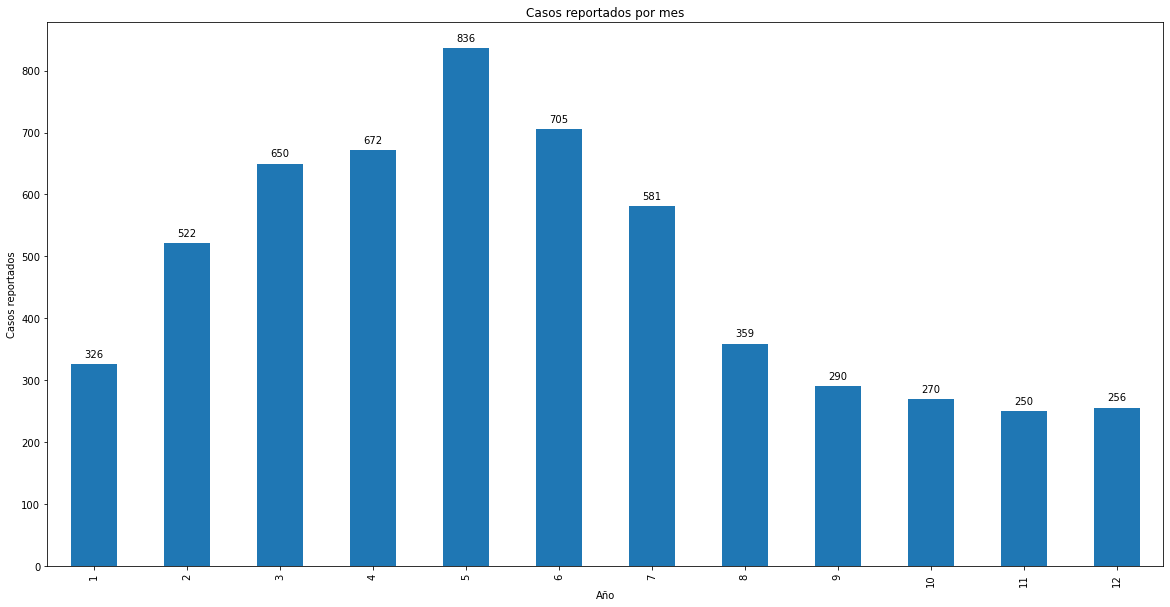

In [15]:
years = dfYopal['Date'].dt.month.value_counts().sort_index().plot(kind='bar', figsize=(20, 10))
years.set_xlabel('Año')
years.set_ylabel('Casos reportados')
years.set_title('Casos reportados por mes')

for p in years.patches:
    years.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

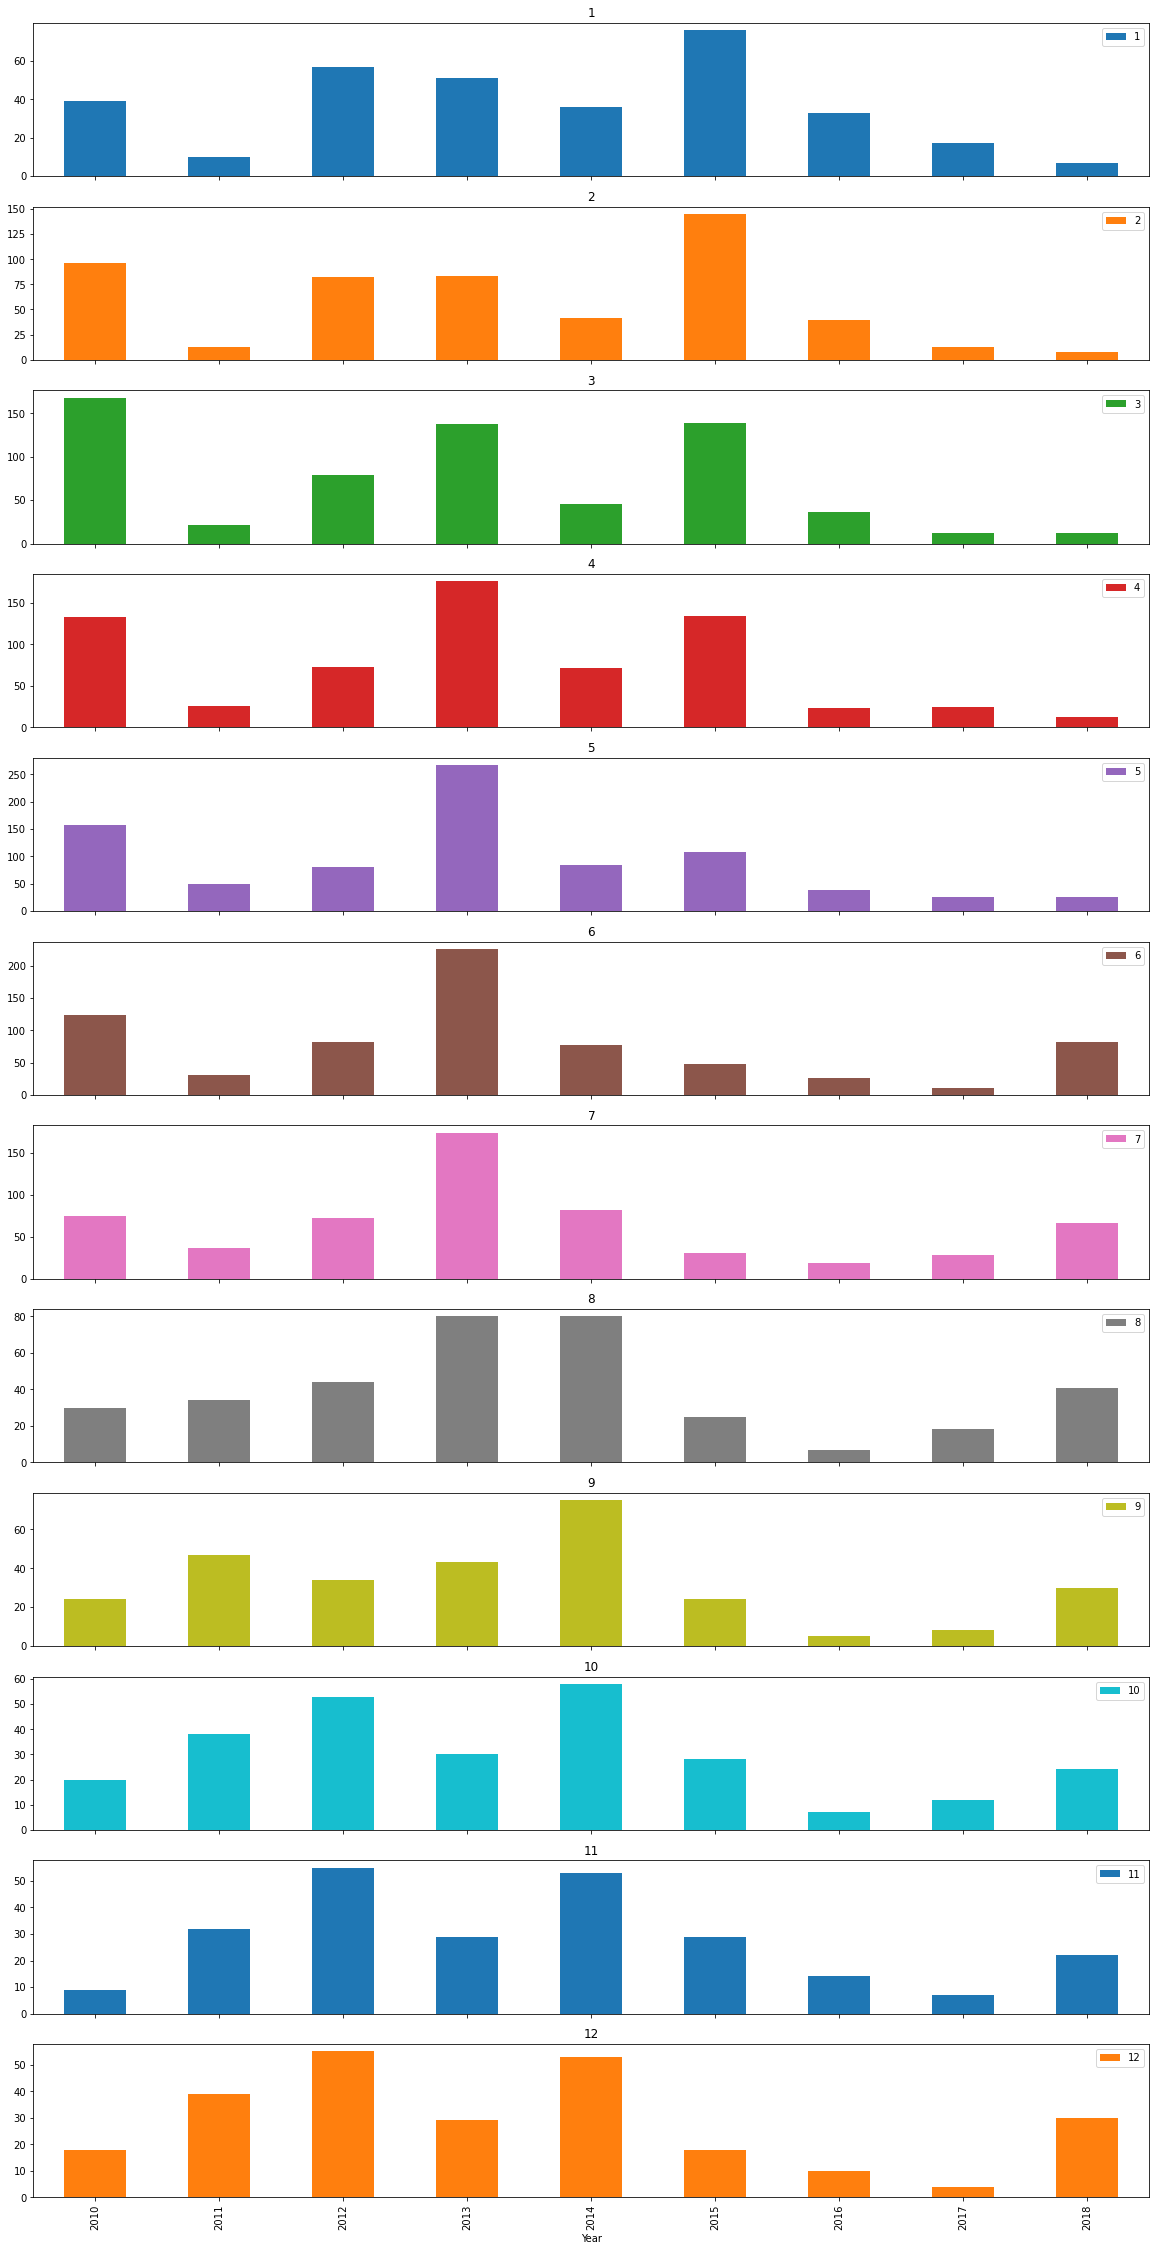

In [16]:
aux = dfYopal
aux['Year'] = aux['Date'].dt.year 
aux['Month'] = aux['Date'].dt.month 
months = aux.groupby(["Year", 'Month']).size().unstack(level=1).plot(kind='bar', figsize=(20,40), subplots=True)

### *Número de casos reportados por sexo*

Text(0.5, 1.0, 'Porcentaje de casos reportados por sexo desde el 2010 hasta el 2018')

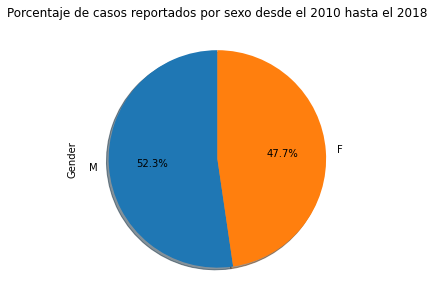

In [17]:
gender = dfYopal['Gender'].value_counts().plot(kind='pie', shadow = True,startangle=90, figsize=(10,5), autopct='%1.1f%%')
gender.set_title("Porcentaje de casos reportados por sexo desde el 2010 hasta el 2018")

### *Número de casos reportados por comuna*

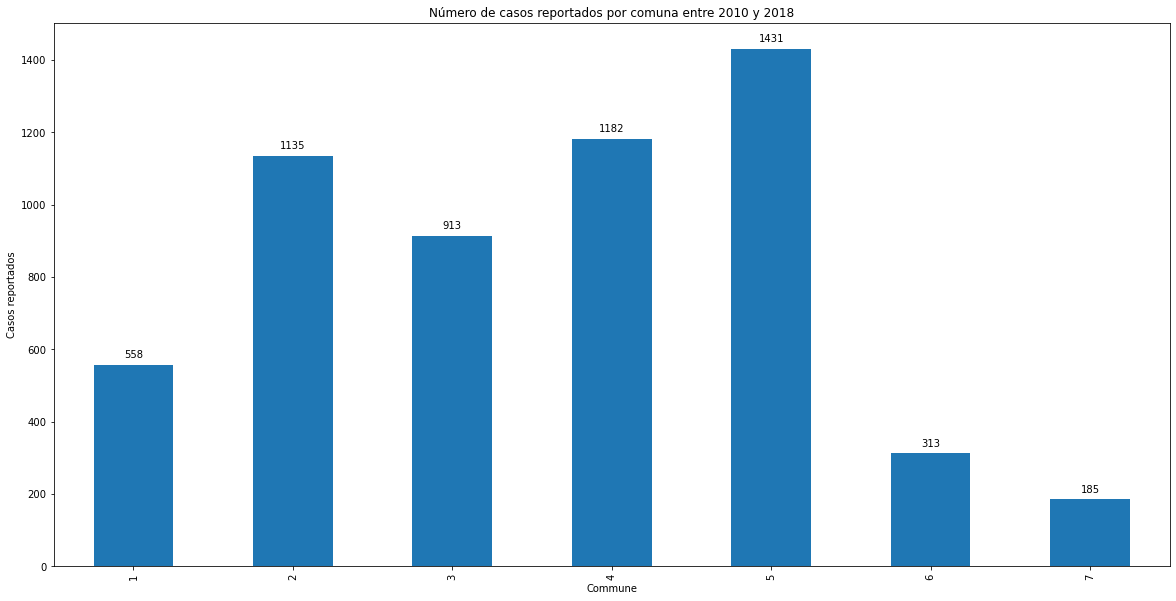

In [18]:
commune = dfYopal['Commune'].value_counts().sort_index().plot(kind='bar', figsize=(20, 10))
commune.set_xlabel('Commune')
commune.set_ylabel('Casos reportados')
commune.set_title('Número de casos reportados por comuna entre 2010 y 2018')

for p in commune.patches:
    commune.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

Text(0.5, 1.0, 'Número de casos reportados por año y comunas')

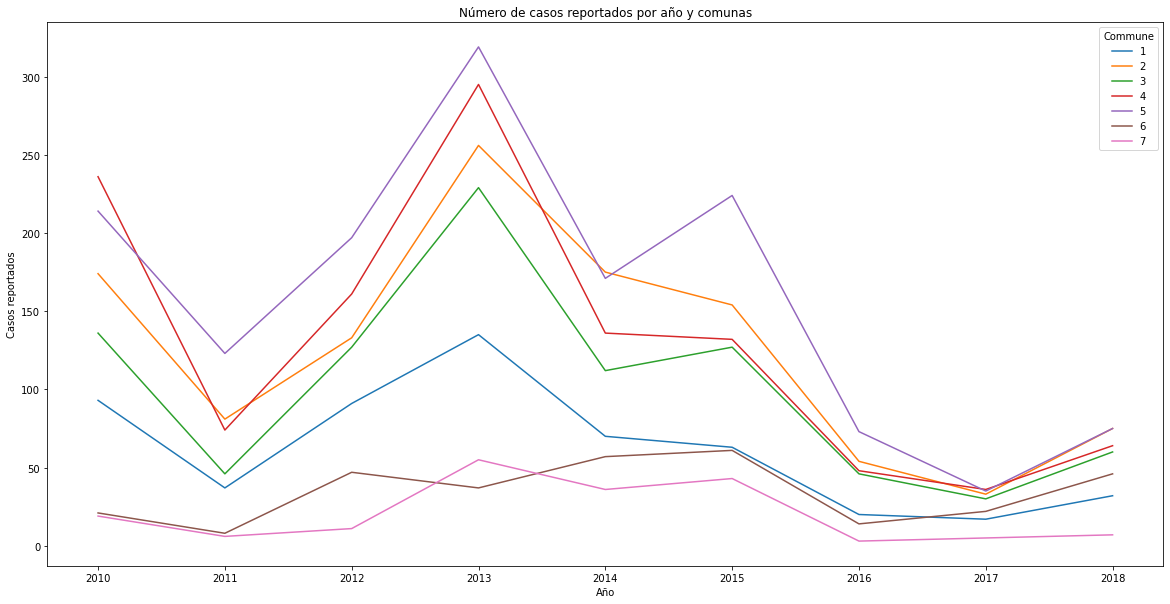

In [19]:
communes_by_year = aux.groupby(["Year", 'Commune']).size().unstack(level=1).plot(kind='line', figsize=(20,10))
communes_by_year.set_xlabel('Año')
communes_by_year.set_ylabel('Casos reportados')
communes_by_year.set_title('Número de casos reportados por año y comunas')

### *Número de casos reportados por barrio*

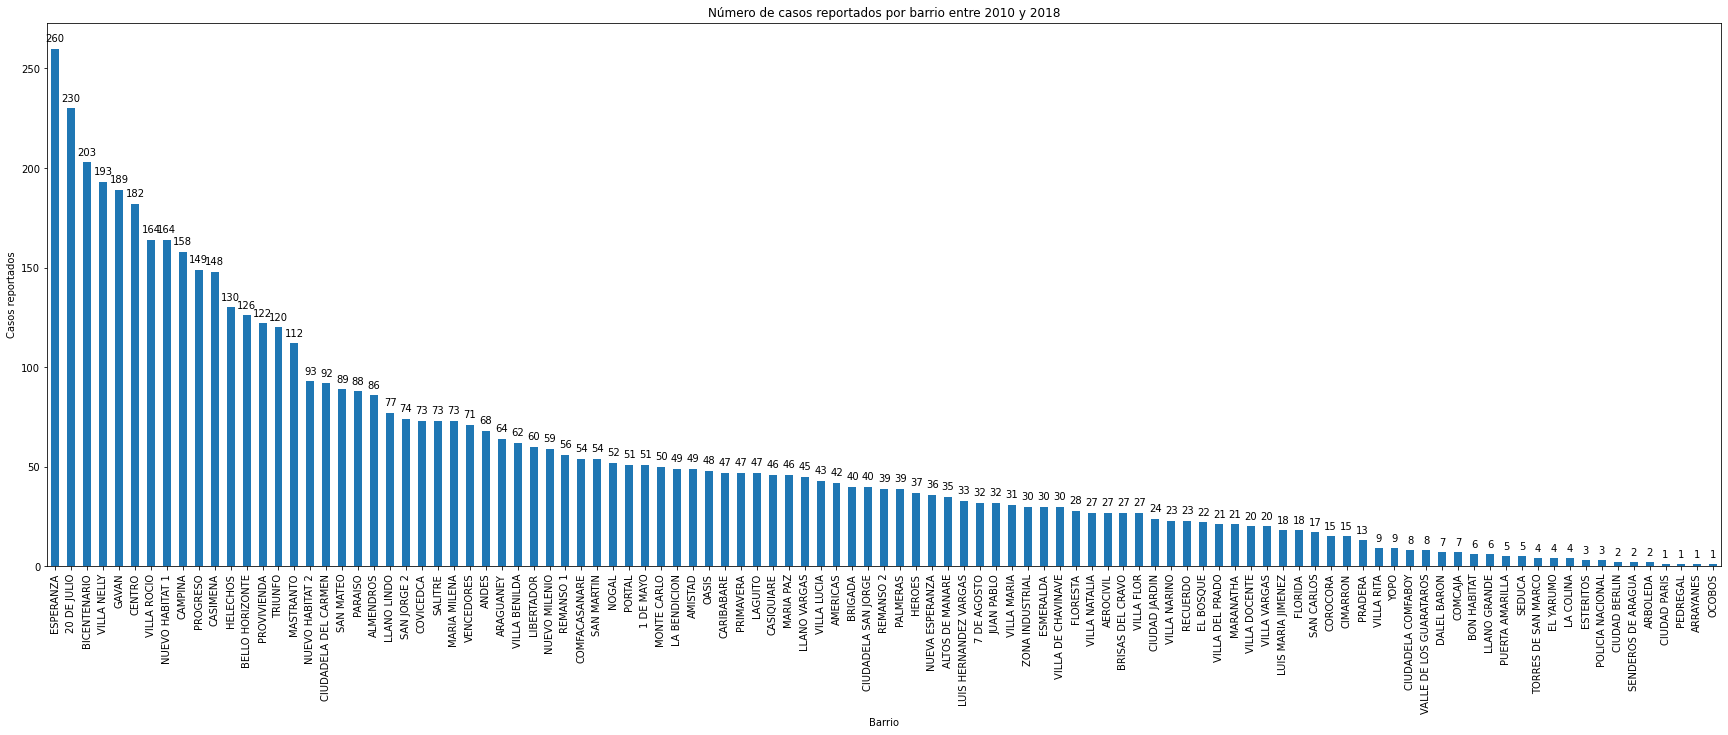

In [20]:
neighborhood = dfYopal['Neighborhood'].value_counts().plot(kind='bar', figsize=(30,10))
neighborhood.set_xlabel('Barrio')
neighborhood.set_ylabel('Casos reportados')
neighborhood.set_title('Número de casos reportados por barrio entre 2010 y 2018')

for p in neighborhood.patches:
    neighborhood.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

### *Número de casos por edad*

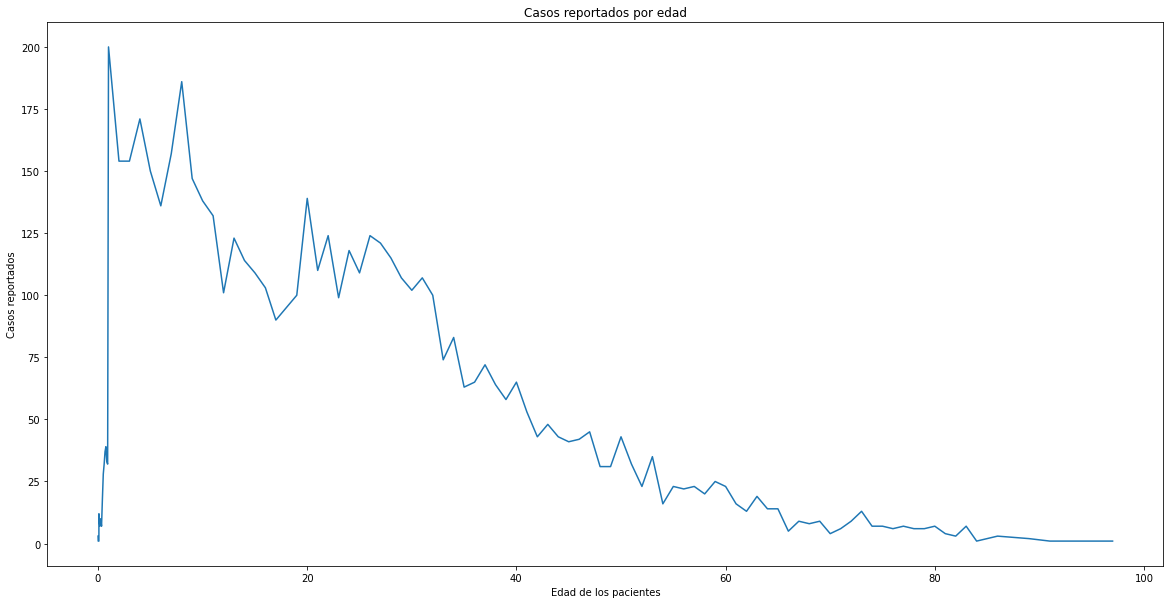

In [21]:
ages = dfYopal['Age'].value_counts().sort_index().plot(kind='line', figsize=(20, 10))
ages.set_xlabel('Edad de los pacientes')
ages.set_ylabel('Casos reportados')
ages.set_title('Casos reportados por edad')

for p in ages.patches:
    ages.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

### *Casos reportados por día*

Text(0.5, 1.0, 'Casos reportados por día')

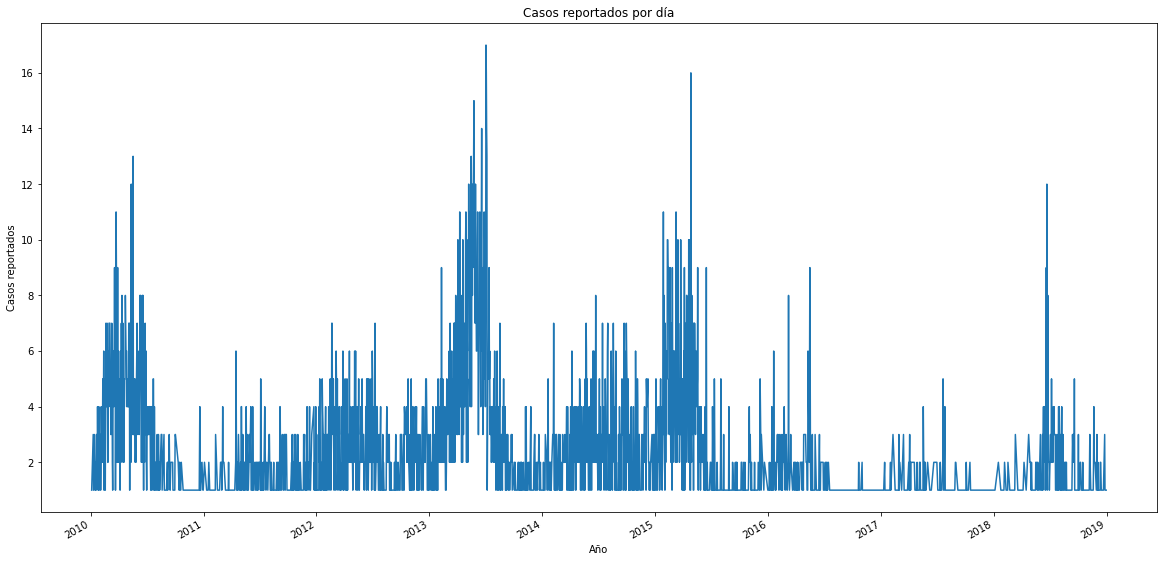

In [22]:
days = dfYopal['Date'].value_counts().plot(kind='line', figsize=(20, 10))
days.set_xlabel('Año')
days.set_ylabel('Casos reportados')
days.set_title('Casos reportados por día')

## GIRÓN

In [4]:
dfGiron = df[df.City == 'Girón']
dfGiron.head()

,City,Date,Age,Gender,Neighborhood,Commune
Id,,,,,,
3540,Girón,2014-12-22,12.0,M,EL CONSUELO,1
3541,Girón,2010-06-19,10.0,F,CORVIANDI I,1
3542,Girón,2012-10-19,12.0,F,CORVIANDI I,1
3543,Girón,2014-05-22,14.0,F,ARENALES,1
3544,Girón,2013-11-01,13.0,M,SANTA CRUZ,1


### *Número de casos reportados por año*

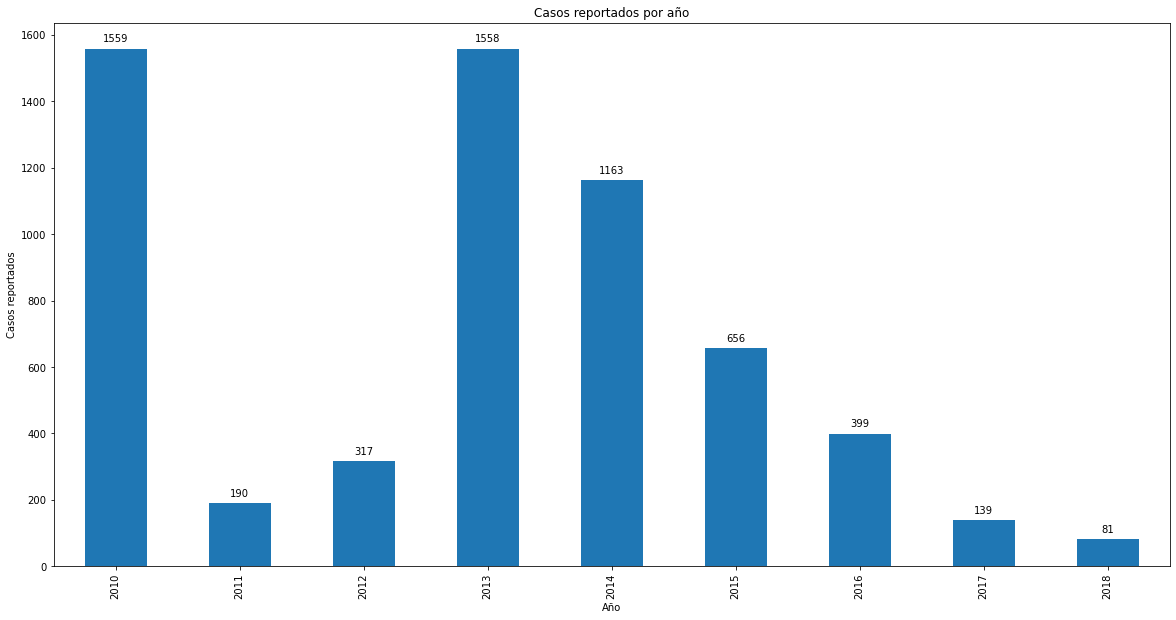

In [5]:
years = dfGiron['Date'].dt.year.value_counts().sort_index().plot(kind='bar', figsize=(20, 10))
years.set_xlabel('Año')
years.set_ylabel('Casos reportados')
years.set_title('Casos reportados por año')

for p in years.patches:
    years.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

### *Número de casos reportados por mes*

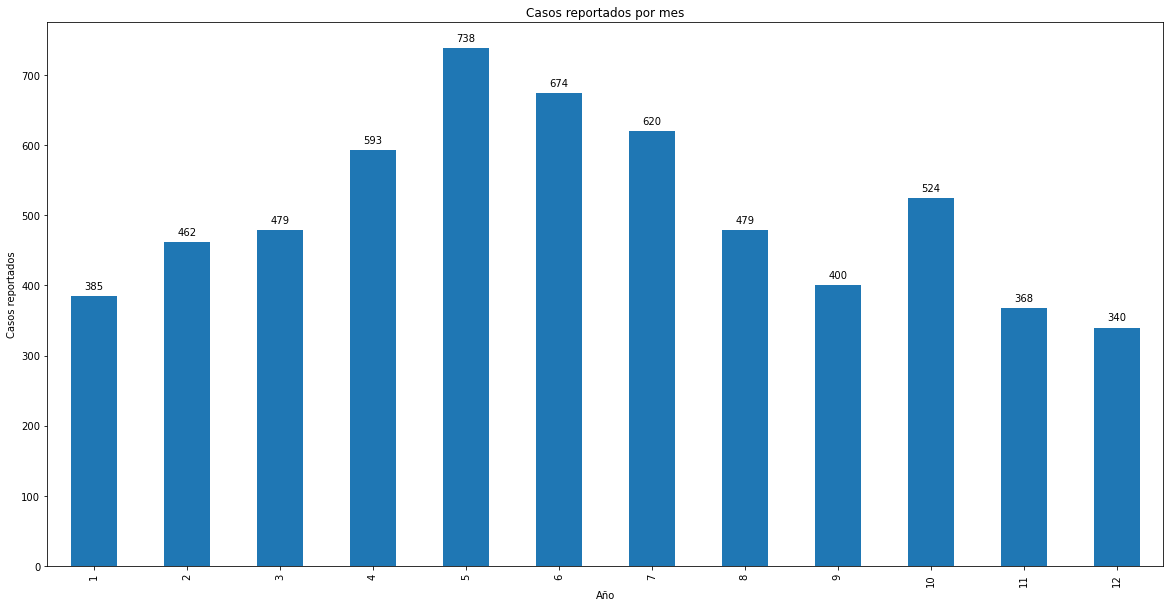

In [25]:
years = dfGiron['Date'].dt.month.value_counts().sort_index().plot(kind='bar', figsize=(20, 10))
years.set_xlabel('Año')
years.set_ylabel('Casos reportados')
years.set_title('Casos reportados por mes')

for p in years.patches:
    years.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

<ipython-input-26-16d68563a2b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux['Year'] = aux['Date'].dt.year
<ipython-input-26-16d68563a2b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux['Month'] = aux['Date'].dt.month


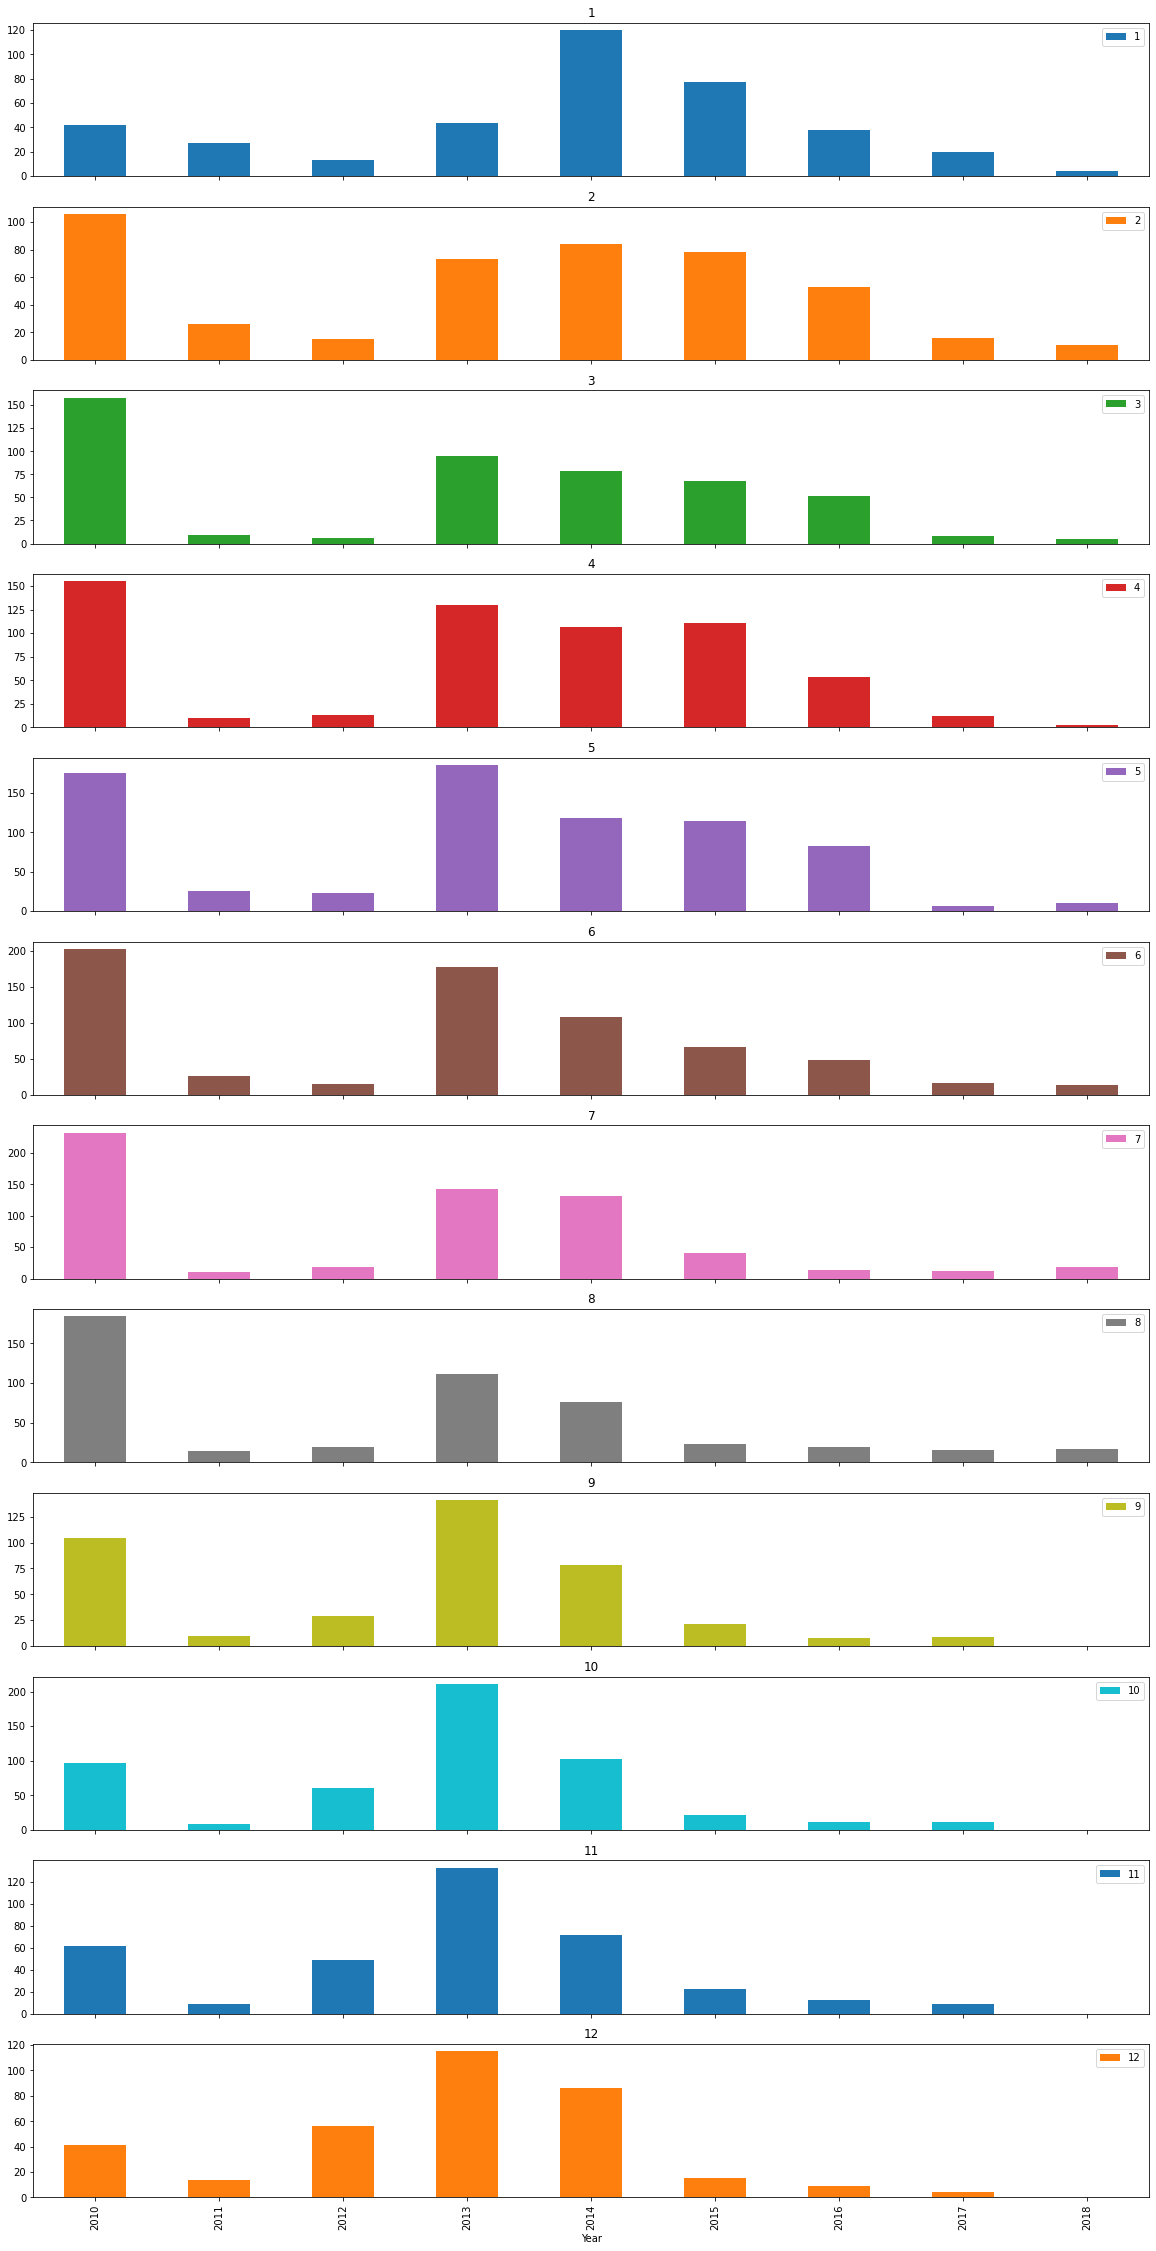

In [26]:
aux = dfGiron
aux['Year'] = aux['Date'].dt.year 
aux['Month'] = aux['Date'].dt.month 
months = aux.groupby(["Year", 'Month']).size().unstack(level=1).plot(kind='bar', figsize=(20,40), subplots=True)

### *Número de casos reportados por sexo*

Text(0.5, 1.0, 'Porcentaje de casos reportados por sexo desde el 2010 hasta el 2018')

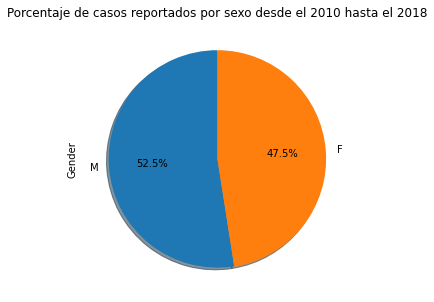

In [27]:
gender = dfGiron['Gender'].value_counts().plot(kind='pie', shadow = True,startangle=90, figsize=(10,5), autopct='%1.1f%%')
gender.set_title("Porcentaje de casos reportados por sexo desde el 2010 hasta el 2018")

### *Número de casos reportados por barrio*

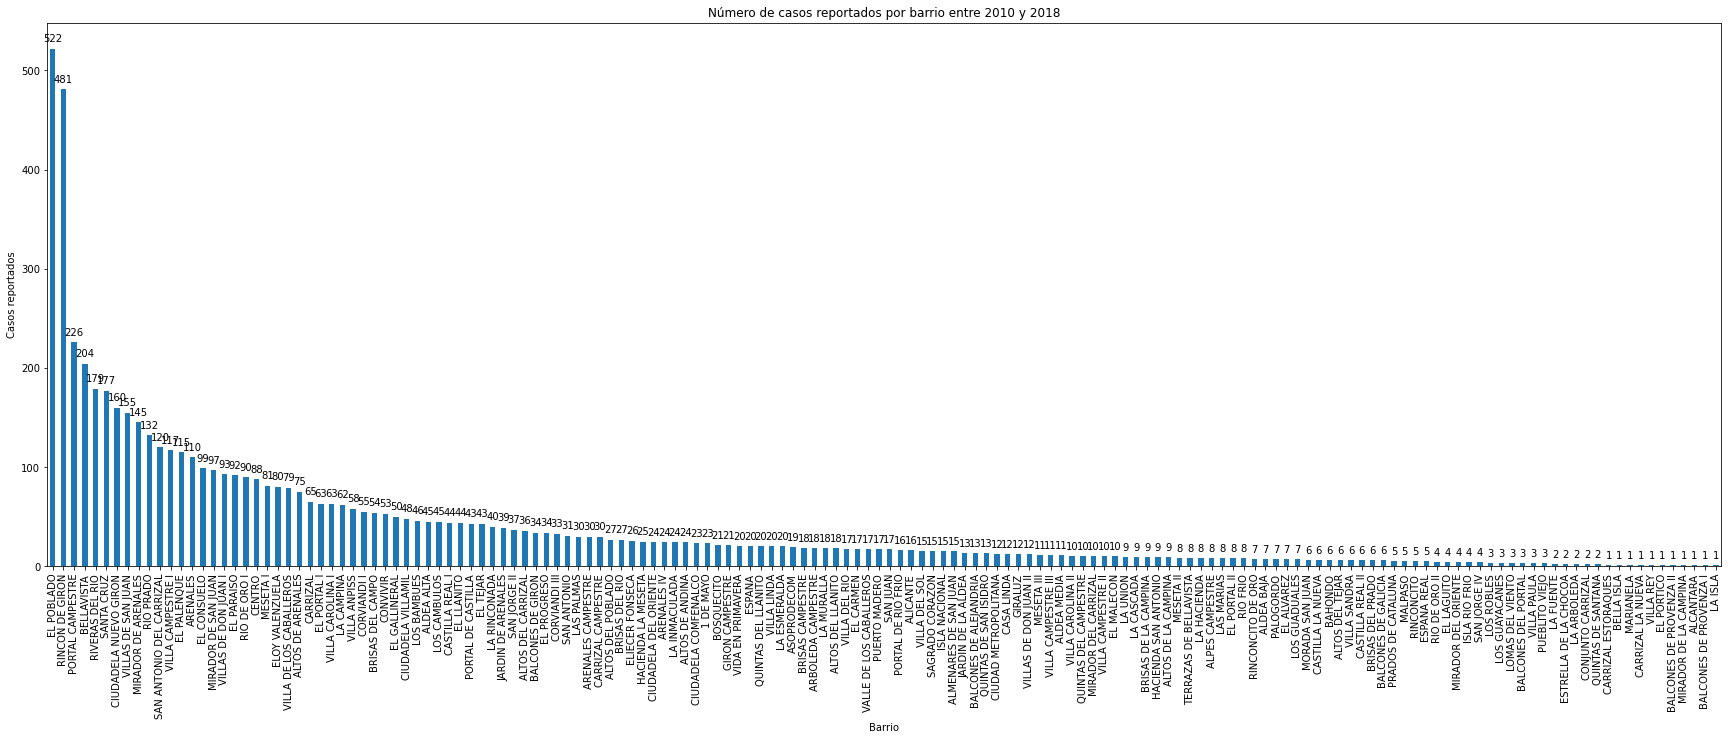

In [28]:
neighborhood = dfGiron['Neighborhood'].value_counts().plot(kind='bar', figsize=(30,10))
neighborhood.set_xlabel('Barrio')
neighborhood.set_ylabel('Casos reportados')
neighborhood.set_title('Número de casos reportados por barrio entre 2010 y 2018')

for p in neighborhood.patches:
    neighborhood.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

### *Número de casos reportados por edad*

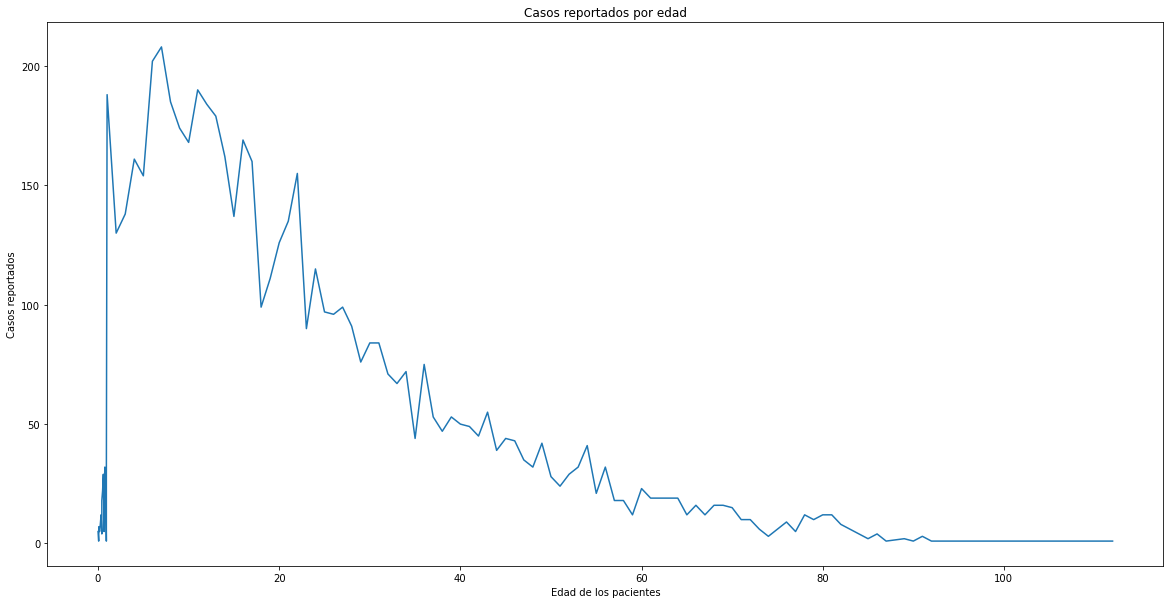

In [29]:
ages = dfGiron['Age'].value_counts().sort_index().plot(kind='line', figsize=(20, 10))
ages.set_xlabel('Edad de los pacientes')
ages.set_ylabel('Casos reportados')
ages.set_title('Casos reportados por edad')

for p in ages.patches:
    ages.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',                              
                xytext=(0, 10),
                textcoords='offset points')

### *Número de casos reportados por día*

Text(0.5, 1.0, 'Casos reportados por día')

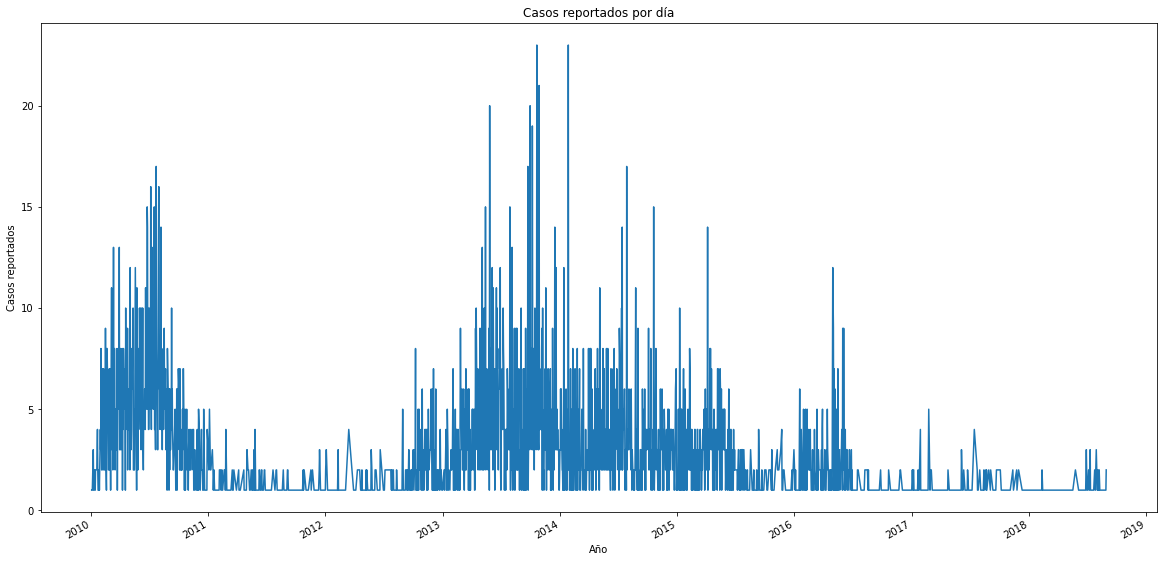

In [30]:
days = dfGiron['Date'].value_counts().plot(kind='line', figsize=(20, 10))
days.set_xlabel('Año')
days.set_ylabel('Casos reportados')
days.set_title('Casos reportados por día')

# ANÁLISIS 

**PARA EL MUNICIPIO DE BUGA**

- Se reportaron un total de **3539** casos de dengue entre los años 2010 y 2019
- Los años con mayor incidencia fueron 2010, 2014, 2016 y 2019.
- Los primeros meses del año son los más propensos a que ocurran casos de dengue, esto es debido a las temporadas de lluvia y calor a princpios del año.
- Se puede ver que existe bastante actividad mensual en los años 2010, 2014, 2016 y 2019. Esto se debe a que el dengue es una enfermedad endémica que tiene rebrotes prolongados aproximadamente cada tres años, sobretodo en zonas tropicales como Buga.
- Existe poco porcentaje de diferencia en cuanto a contagios por sexo, las cifras no son del todo significativas.
- De las seis comunas, la 5 es la más afectada de todas.
- Durante todos los años, el 91% de las veces la comuna 5 ha sido la que ocupa el mayor número de casos.
- Fuemayor y Santa Bárbara son los barrios con mayor número de casos de dengue durante 2010 y 2019 con el 14% de los datos.
- Existe una tendencia de mayores casos de dengue en personas entre 3 y 20 años de edad.

**PARA EL MUNICIPIO DE YOPAL**

- Se reportaron **5717** casos de dengue entre los años 2010 y 2018
- Los años con mayor incidencia fueron 2010, 2013 y 2015.
- Mayo y Junio son los meses más afectados por casos de dengue.
- Se puede ver que existe una actividad mensual bastante variado, sin embargo se puede observa una tendencia en los años 2010, 2012, 2013, 2014, 2015 y 2016. 
- Existe poco porcentaje de diferencia en cuanto a contagios por sexo, las cifras no son del todo significativas.
- De las seis comunas, la 5 es la más afectada de todas.
- Durante todos los años, la comuna 5 ha sido mayormante la que tiene más número de casos.
- Esperanza y 20 de Julio son los barrios con mayor número de casos de dengue durante 2010 y 2018.
- Las edades más afectadas son entre los 3 y 37 años de edad.

**PARA EL MUNICIPIO DE GIRÓN**

- Se reportaron **6062** casos de dengue entre los años 2010 y 2018
- Los años con mayor incidencia fueron 2010, 2013 y 2014.
- Mayo, Junio y Julio son los meses más afectados por casos de dengue.
- Se puede ver que existe una actividad mensual bastante variado, sin embargo se puede observa una tendencia en los años 2010, 2012, y 2013.
- Existe poco porcentaje de diferencia en cuanto a contagios por sexo, las cifras no son del todo significativas.
- El Poblado y El Rincón de Girón son los barrios con mayor número de casos de dengue durante 2010 y 2018.
- Las edades más afectadas son entre los 3 y 27 años de edad.